In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
np.random.seed(42)

N_USERS = 500
N_DAYS = 30
ANOMALY_USER_RATIO = 0.06

users= [f"user_{i}" for i in range(N_USERS)]
dates= [datetime.today().date() - timedelta(days=i) for i in range(N_DAYS)]
dates= sorted(dates)

anomaly_users = set(np.random.choice(
    users,
    size=int(N_USERS * ANOMALY_USER_RATIO),
    replace=False
))

In [3]:
data = []

for user in users:
    base_sessions = np.random.randint(2, 6)
    base_actions = np.random.randint(40, 120)
    base_duration = np.random.uniform(3, 8)

    is_anomaly_user = user in anomaly_users

    for day in dates:
        sessions = max(0, int(np.random.normal(base_sessions, 1)))
        actions = max(0, int(np.random.normal(base_actions, 20)))
        avg_session_duration = max(0.5, np.random.normal(base_duration, 1))

        night_activity_ratio = np.clip(np.random.normal(0.15, 0.05), 0, 1)
        avg_time_between_sessions = np.random.uniform(1, 5)
        inactivity_hours = np.random.uniform(0, 8)

       
        if is_anomaly_user and np.random.rand() < 0.2:
            anomaly_type = np.random.choice(["spike", "drop", "night", "erratic"])

            if anomaly_type == "spike":
                sessions *= np.random.randint(3, 6)
                actions *= np.random.randint(4, 8)

            elif anomaly_type == "drop":
                sessions = np.random.randint(0, 1)
                actions = np.random.randint(0, 10)
                inactivity_hours = np.random.uniform(12, 24)

            elif anomaly_type == "night":
                night_activity_ratio = np.random.uniform(0.7, 1.0)

            elif anomaly_type == "erratic":
                avg_session_duration *= np.random.uniform(0.3, 2.5)

        data.append([
            user,
            day,
            sessions,
            actions,
            avg_session_duration,
            night_activity_ratio,
            avg_time_between_sessions,
            inactivity_hours,
            int(is_anomaly_user)
        ])

In [4]:
columns = [
    "user_id",
    "date",
    "sessions_count",
    "actions_count",
    "avg_session_duration",
    "night_activity_ratio",
    "avg_time_between_sessions",
    "inactivity_hours",
    "is_anomaly_user"  
]

df = pd.DataFrame(data, columns=columns)

In [5]:
df.head()

,user_id,date,sessions_count,actions_count,avg_session_duration,night_activity_ratio,avg_time_between_sessions,inactivity_hours,is_anomaly_user
0,user_0,2026-01-05,5,105,6.072968,0.157409,4.777006,6.937591,0
1,user_0,2026-01-06,5,107,6.254305,0.240448,1.514001,6.489633,0
2,user_0,2026-01-07,4,119,6.006626,0.203032,1.826737,2.191689,0
3,user_0,2026-01-08,3,71,5.615499,0.128499,2.346217,5.245781,0
4,user_0,2026-01-09,5,77,4.266969,0.108767,2.984150,5.543123,0


In [6]:
df.describe()

,sessions_count,actions_count,avg_session_duration,night_activity_ratio,avg_time_between_sessions,inactivity_hours,is_anomaly_user
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.947933,80.787333,5.547470,0.151872,3.001187,4.056813,0.060000
std,1.607045,40.432629,1.790178,0.062500,1.144874,2.431935,0.237495
min,0.000000,0.000000,0.482667,0.000000,1.000385,0.000067,0.000000
25%,2.000000,57.000000,4.200401,0.116703,2.025179,2.041788,0.000000
50%,3.000000,80.000000,5.558434,0.150380,3.017355,4.050933,0.000000
75%,4.000000,102.000000,6.873013,0.183264,3.985979,6.019243,0.000000
max,25.000000,952.000000,16.662250,0.988341,4.999076,23.855508,1.000000


In [7]:
df["is_anomaly_user"].value_counts(normalize=True)

is_anomaly_user
0    0.94
1    0.06
Name: proportion, dtype: float64

In [8]:

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    15000 non-null  object 
 1   date                       15000 non-null  object 
 2   sessions_count             15000 non-null  int64  
 3   actions_count              15000 non-null  int64  
 4   avg_session_duration       15000 non-null  float64
 5   night_activity_ratio       15000 non-null  float64
 6   avg_time_between_sessions  15000 non-null  float64
 7   inactivity_hours           15000 non-null  float64
 8   is_anomaly_user            15000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.0+ MB


user_id                      0
date                         0
sessions_count               0
actions_count                0
avg_session_duration         0
night_activity_ratio         0
avg_time_between_sessions    0
inactivity_hours             0
is_anomaly_user              0
dtype: int64

In [9]:
normal_df = df[df["is_anomaly_user"] == 0]
anomaly_df = df[df["is_anomaly_user"] == 1]


NameError: name 'plt' is not defined

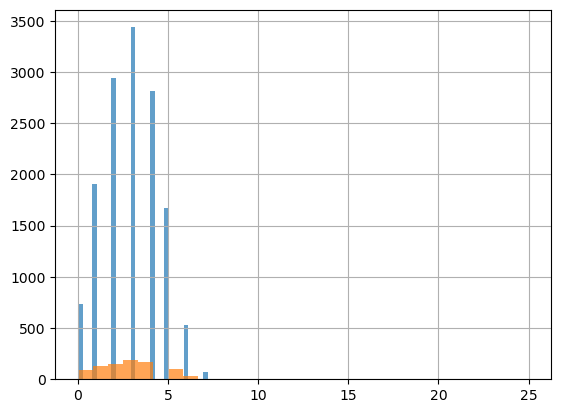

In [10]:
normal_df["sessions_count"].hist(bins=30, alpha=0.7, label="Normal")
anomaly_df["sessions_count"].hist(bins=30, alpha=0.7, label="Anomaly")
plt.legend()
plt.title("Sessions Count Distribution")
plt.show()

NameError: name 'plt' is not defined

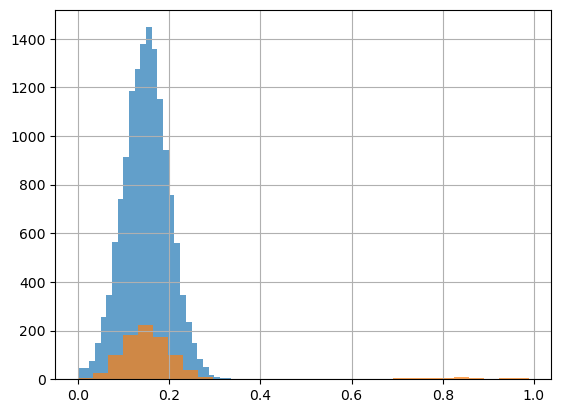

In [11]:
normal_df["night_activity_ratio"].hist(bins=30, alpha=0.7, label="Normal")
anomaly_df["night_activity_ratio"].hist(bins=30, alpha=0.7, label="Anomaly")
plt.legend()
plt.title("Night Activity Ratio")
plt.show()

In [15]:
features = [
    "sessions_count",
    "actions_count",
    "avg_session_duration",
    "night_activity_ratio",
    "avg_time_between_sessions",
    "inactivity_hours"
]

df[features].corr()

,sessions_count,actions_count,avg_session_duration,night_activity_ratio,avg_time_between_sessions,inactivity_hours
sessions_count,1.000000,0.117052,0.040128,-0.002691,-0.008482,-0.038181
actions_count,0.117052,1.000000,0.017468,-0.003903,-0.002637,-0.017529
avg_session_duration,0.040128,0.017468,1.000000,0.010074,0.005721,0.001569
night_activity_ratio,-0.002691,-0.003903,0.010074,1.000000,-0.005304,0.007888
avg_time_between_sessions,-0.008482,-0.002637,0.005721,-0.005304,1.000000,-0.001908
inactivity_hours,-0.038181,-0.017529,0.001569,0.007888,-0.001908,1.000000


In [16]:
features = [
    "sessions_count",
    "actions_count",
    "avg_session_duration",
    "night_activity_ratio",
    "avg_time_between_sessions",
    "inactivity_hours"
]

X = df[features]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.06,   
    random_state=42
)

iso_forest.fit(X_scaled)

IsolationForest(contamination=0.06, n_estimators=200, random_state=42)

In [19]:
df["anomaly_score"] = iso_forest.decision_function(X_scaled)
df["anomaly_flag"] = iso_forest.predict(X_scaled)

In [20]:
df["anomaly_flag"].value_counts()

anomaly_flag
 1    14100
-1      900
Name: count, dtype: int64

In [21]:
pd.crosstab(df["is_anomaly_user"], df["anomaly_flag"])

anomaly_flag,-1,1
is_anomaly_user,,
0,712,13388
1,188,712


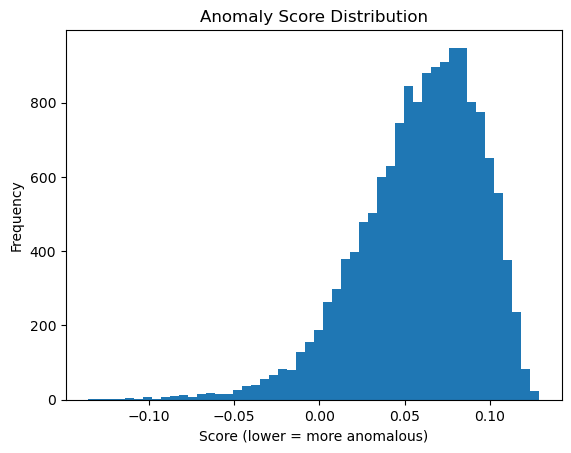

In [22]:
import matplotlib.pyplot as plt

plt.hist(df["anomaly_score"], bins=50)
plt.title("Anomaly Score Distribution")
plt.xlabel("Score (lower = more anomalous)")
plt.ylabel("Frequency")
plt.show()

In [23]:
top_anomalies = (
    df.groupby("user_id")["anomaly_score"]
    .mean()
    .sort_values()
    .head(10)
)

top_anomalies

user_id
user_155    0.010092
user_9      0.013125
user_361    0.021566
user_458    0.025441
user_497    0.025944
user_30     0.027258
user_68     0.028094
user_461    0.028219
user_114    0.028717
user_13     0.029066
Name: anomaly_score, dtype: float64

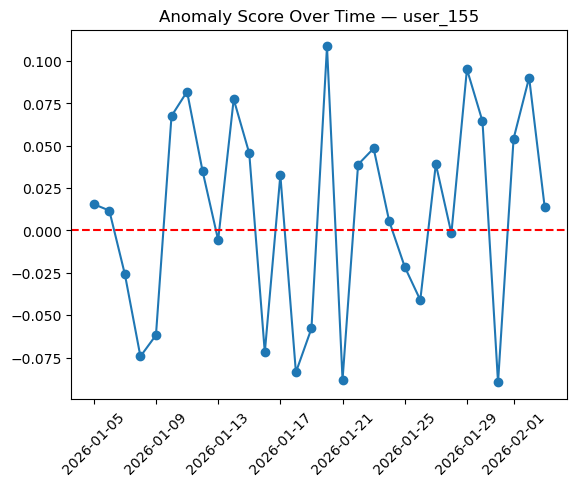

In [24]:
user = top_anomalies.index[0]
user_data = df[df["user_id"] == user]

plt.plot(user_data["date"], user_data["anomaly_score"], marker="o")
plt.axhline(0, linestyle="--", color="red")
plt.xticks(rotation=45)
plt.title(f"Anomaly Score Over Time — {user}")
plt.show()


In [25]:
normal_mask = df["anomaly_flag"] == 1
baseline_means = df.loc[normal_mask, features].mean()
baseline_stds = df.loc[normal_mask, features].std()

In [26]:
anomalous_row = df[df["anomaly_flag"] == -1].iloc[0]
anomalous_row[features]

sessions_count                      5
actions_count                     133
avg_session_duration          6.97923
night_activity_ratio         0.146211
avg_time_between_sessions    1.311061
inactivity_hours             0.018715
Name: 91, dtype: object

In [27]:
deviation_scores = (
    (anomalous_row[features] - baseline_means)
    / baseline_stds
).abs()

deviation_scores.sort_values(ascending=False)

actions_count                1.773333
inactivity_hours              1.76743
avg_time_between_sessions    1.509309
sessions_count               1.425722
avg_session_duration         0.831811
night_activity_ratio         0.072338
dtype: object

In [28]:
top_features = deviation_scores.sort_values(ascending=False).head(3)

for feature, score in top_features.items():
    print(
        f"{feature}: value={anomalous_row[feature]:.2f}, "
        f"baseline={baseline_means[feature]:.2f}, "
        f"deviation={score:.2f}σ"
    )

actions_count: value=133.00, baseline=79.72, deviation=1.77σ
inactivity_hours: value=0.02, baseline=4.02, deviation=1.77σ
avg_time_between_sessions: value=1.31, baseline=3.00, deviation=1.51σ


In [29]:
user = anomalous_row["user_id"]

user_explanations = (
    df[df["user_id"] == user]
    .assign(
        deviation=lambda x: (
            (x[features] - baseline_means) / baseline_stds
        ).abs().sum(axis=1)
    )
    .sort_values("deviation", ascending=False)
    .head(5)
)

user_explanations[["date", "deviation"] + features]

,date,deviation,sessions_count,actions_count,avg_session_duration,night_activity_ratio,avg_time_between_sessions,inactivity_hours
93,2026-01-08,9.591883,6,114,8.613879,0.218399,4.922307,7.226911
96,2026-01-11,8.494417,6,93,9.132815,0.014375,3.578187,5.201339
101,2026-01-16,7.506913,4,96,8.063156,0.045739,3.929087,0.026771
119,2026-02-03,7.433448,7,86,6.071095,0.219145,1.262505,6.572104
91,2026-01-06,7.379943,5,133,6.979230,0.146211,1.311061,0.018715


In [30]:
df["severity"] = pd.qcut(
    df["anomaly_score"],
    q=[0, 0.05, 0.15, 1],
    labels=["High", "Medium", "Low"]
)